<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du lagrangien augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problèmes sans
contraintes (fichier `src/lagrangien_augmente.jl`). La spécification est donnée dans le fichier.
2. Vérifier que les tests ci-dessous passent.
 

In [1]:
include("../src/lagrangien_augmente.jl")
include("../test/tester_lagrangien_augmente.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_lagrangien_augmente(lagrangien_augmente, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0, 1, 1]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 3
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f1:
  * x0       = [0.5, 1.25, 1.0]
  * x_sol    = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(x_sol) = 0.75
  * nb_iters = 7
  * flag     = 0
  * solution = [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : LA et newton appliqué à f2:
  * x0       = [1, 0]
  * x_sol    = [0.9072338859288741, 0.8227553207255176]
  * f(x_sol) = 100
  * nb_iters = 5
  * flag     = 0
  * solution = [0.9072339605110892, 0.82275545631455]
--------------------------------------

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs en sortie de $\lambda_k$ et $\mu_k$.
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.

## Réponses

**Question 1**

**Analyse des résultats:**

En appliquant l'algorithme de Lagrengien Augmenté avec l'algorithme de Newton ou Pas de Cauchy ou Gradient Conjugué Tronqué sur la fonction $f_{1}$, nous trouvons la solution après 7 itération, et pour $f_{2}$, nous trouvons la solution après 5 itérations.
En général, les solutions optimales obtenues par différents algorithmes sont cohérentes entre elles pour chaque fonction, et le nombre d'itérations est assez faible, ce qui indique la convergence rapide.

**Influence des paramètres $\lambda_k$ et $\mu_k$**

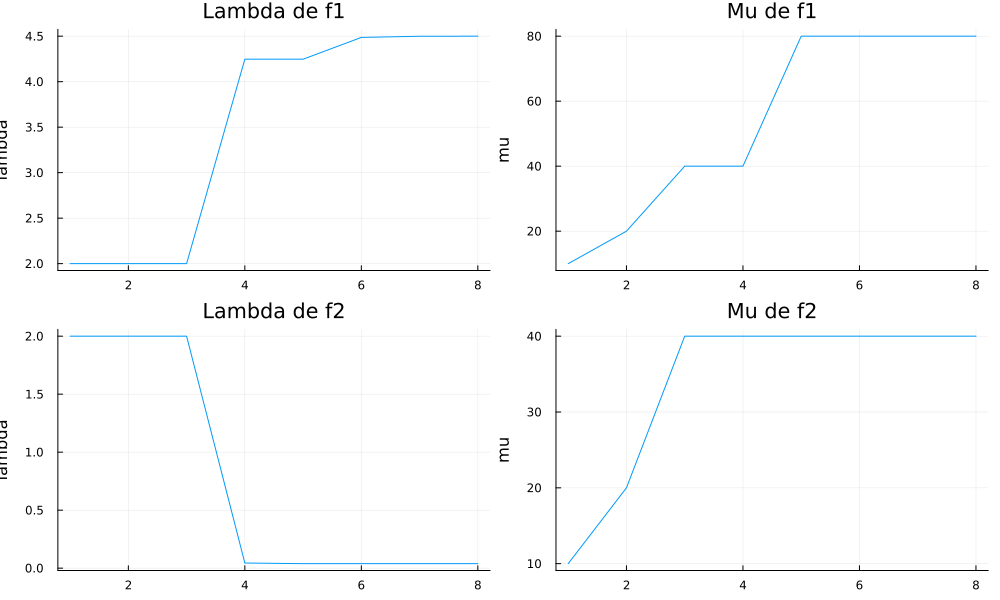

In [2]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")         # votre algorithme de Newton
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

_,_,_,_,u_f2,lambda_f2 = lagrangien_augmente(fct2, grad_fct2, hess_fct2, contrainte2, grad_contrainte2, hess_contrainte2, x04)

# 𝜆𝑘
courbe_lambda_f2 = plot(lambda_f2, xlabel = "", ylabel = "lambda", title = "Lambda de f2", legend = false)

# 𝜇𝑘
courbe_mu_f2 = plot(u_f2, xlabel = "", ylabel = "mu", title = "Mu de f2", legend = false)

_,_,_,_,u_f1,lambda_f1 = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton", tol_abs = 1e-4)

# 𝜆𝑘
courbe_lambda_f1 = plot(lambda_f1, xlabel = "", ylabel = "lambda", title = "Lambda de f1", legend = false)

# 𝜇𝑘
courbe_mu_f1 = plot(u_f1, xlabel = "", ylabel = "mu", title = "Mu de f1", legend = false)

plot(courbe_lambda_f1, courbe_mu_f1, courbe_lambda_f2, courbe_mu_f2, layout=(2,2), size = (1000, 600))

**Comparaison.** 

- Pour la fonction $f_{1}$, nous observons que $\lambda$ est croissante, car les termes quadratiques dans la fonction $f_{1}$ nécessite une pénalité plus importante pour s'assurer que les contraintes sont respectées de manière stricte. Par contre, pour la fonction $f_{2}$, $\lambda$ est décroissante. f_{2}, étant une fonction de degré 4, nécessite une pénalité moins importante pour assurer la convergence, et la stabilisation à zéro à la fin, indique une fois que la pénalité n'a plus besoin d'augmenter pour maintenirla convergence vers la solution optimale.

- L'augmentation de $\mu$, pour $f_{1}$ et $f_{2}$, montre une intensification de la pénalité pour les contraintes, renforçant ainsi la convergence vers des solutions admissibles. Sauf que, la stabilisation à 40 pour la fonction $f_{2}$ et 80 pour la fonction $f_{1}$, indique que la structure non-quadratique de $f_{2}$ nécessite une pénalité plus petite.

**Question 2**

L'influence du paramètre $\tau$ dans la performance de l'algorithme :

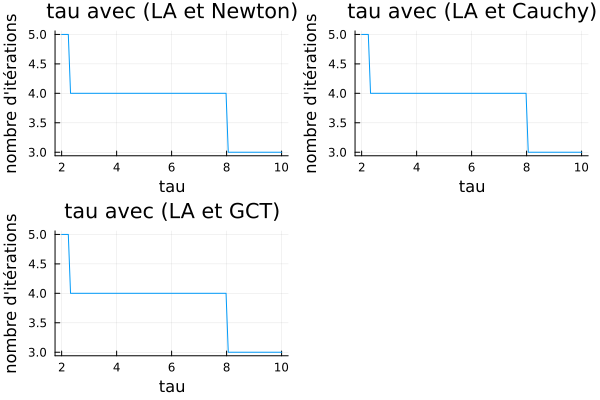

In [3]:
include("../src/regions_de_confiance.jl")
include("../src/newton.jl")         # votre algorithme de Newton
include("../src/lagrangien_augmente.jl")
include("../test/fonctions_de_tests.jl")
using Plots

nb_test = 100
tau_values = range(2,10,length=nb_test)
nb_iters = zeros(nb_test)
for i in 1:nb_test
    _,_,_,nb_iters[i],_,_ = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="newton", τ = tau_values[i], tol_abs = 1e-2)
end

nb_iters_cauchy = zeros(nb_test)
for i in 1:nb_test
    _,_,_,nb_iters_cauchy[i],_,_ = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="rc-cauchy", τ = tau_values[i], tol_abs = 1e-2)
end


nb_iters_gct = zeros(nb_test)
for i in 1:nb_test
    _,_,_,nb_iters_gct[i],_,_ = lagrangien_augmente(fct1, grad_fct1, hess_fct1, contrainte1, grad_contrainte1, hess_contrainte1, x01, algo_noc="rc-gct", τ = tau_values[i], tol_abs = 1e-2)
end

courbe1 = plot(tau_values, nb_iters, xlabel = "tau", ylabel = "nombre d'itérations", title = "tau avec (LA et Newton)", legend = false)
courbe2 = plot(tau_values, nb_iters_cauchy, xlabel = "tau", ylabel = "nombre d'itérations", title = "tau avec (LA et Cauchy)", legend = false)
courbe3 = plot(tau_values, nb_iters_gct, xlabel = "tau", ylabel = "nombre d'itérations", title = "tau avec (LA et GCT)", legend = false)

plot(courbe1, courbe2, courbe3)

**Interprétation.** 

- Nous observons que les courbes du paramètre $\tau$ en fonction du nombre d'itérations sont identiques pour les trois variantes de l'algorithme du Lagrange Augmenté utilisant différentes méthodes d'optimisation.
- En ce qui concerne la variation de $\tau$, le nombre d'itérations diminue à mesure que $\tau$ augmente. La stabilité à la fin indique qu'à $\tau = 8$ il atteint la stabilité optimale. Nous en déduisons que dans le contexte de l'algorithme de Lagrangien Augmenté, le paramètre $\tau$ pose une pénalité plus forte pour les violations de contraintes, conduisant à une convergence plus efficace.